In [7]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
#series = read_csv('Atrium.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = read_csv('megaTeplyStan1.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

mydata$date
2013-01-01    258
2013-02-01    206
2013-03-01    214
2013-04-01     87
2013-05-01    373
Name: Item_Count_Per_Day, dtype: int64


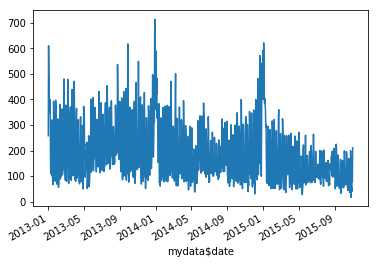

In [8]:
series.plot()
pyplot.show()

C:\Users\User\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


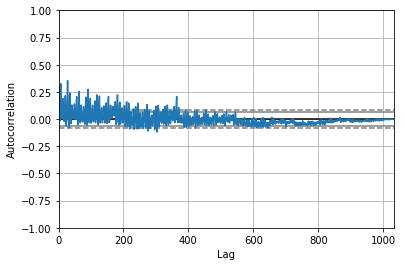

In [9]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

### Checking Stationarity

In [10]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = Series.from_csv('megaTeplyStan1.csv', header=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.469710
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


C:\Users\User\AppData\Local\conda\conda\envs\py36\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details

C:\Users\User\AppData\Local\conda\conda\envs\py36\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


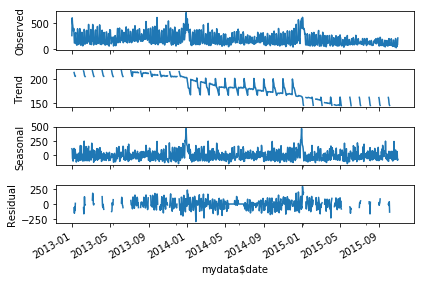

In [11]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = Series.from_csv('megaTeplyStan1.csv', header=0)
result = seasonal_decompose(series, model='additive', freq=365)
result.plot()
pyplot.show()

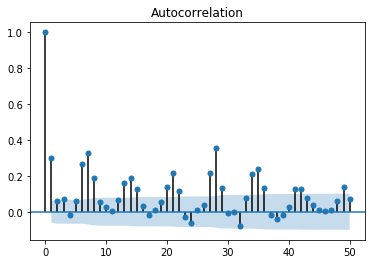

In [12]:
from statsmodels.tsa.stattools import acf, pacf
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=50)
pyplot.show()

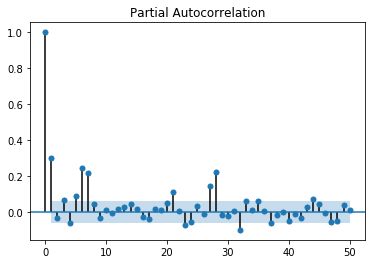

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series,lags=50)
pyplot.show()

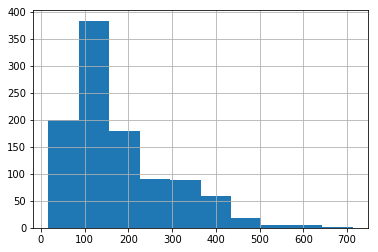

In [14]:
series.hist()
pyplot.show()

C:\Users\User\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                               
Dep. Variable:     D.Item_Count_Per_Day   No. Observations:                 1031
Model:                   ARIMA(1, 1, 2)   Log Likelihood               -6271.645
Method:                         css-mle   S.D. of innovations            105.907
Date:                  Fri, 12 Oct 2018   AIC                          12553.291
Time:                          12:15:55   BIC                          12577.982
Sample:                               1   HQIC                         12562.661
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1036      0.063     -1.647      0.100      -0.227       0.020
ar.L1.D.Item_Count_Per_Day    -0.1883      0.122     -1.542      0.

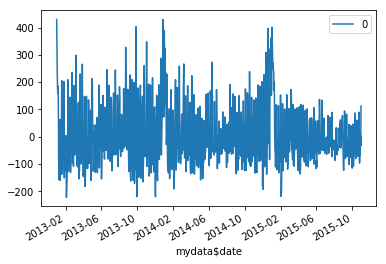

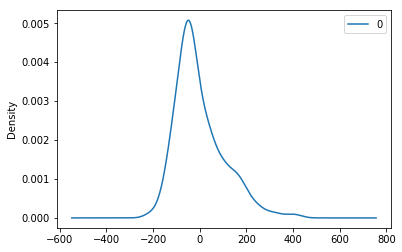

                 0
count  1031.000000
mean     -0.174861
std     106.154526
min    -222.281113
25%     -70.254445
50%     -28.605663
75%      52.761572
max     430.071364


In [15]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
model = ARIMA(series, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [16]:
model = ARIMA(series, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\User\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\User\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARIMA Model Results                               
Dep. Variable:     D.Item_Count_Per_Day   No. Observations:                 1031
Model:                   ARIMA(1, 1, 2)   Log Likelihood               -6271.645
Method:                         css-mle   S.D. of innovations            105.907
Date:                  Fri, 12 Oct 2018   AIC                          12553.291
Time:                          12:15:56   BIC                          12577.982
Sample:                               1   HQIC                         12562.661
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1036      0.063     -1.647      0.100      -0.227       0.020
ar.L1.D.Item_Count_Per_Day    -0.1883      0.122     -1.542      0.

In [17]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [18]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

predicted=151.533415, expected=211.000000
predicted=166.071618, expected=172.000000
predicted=116.644462, expected=62.000000
predicted=96.477114, expected=47.000000
predicted=96.036558, expected=217.000000
predicted=148.480602, expected=152.000000
predicted=156.106216, expected=139.000000
predicted=183.358887, expected=197.000000
predicted=157.899254, expected=63.000000
predicted=103.839320, expected=114.000000
predicted=142.123713, expected=182.000000
predicted=157.273056, expected=77.000000
predicted=154.160227, expected=91.000000
predicted=166.570039, expected=49.000000
predicted=120.898494, expected=169.000000
predicted=150.771799, expected=46.000000
predicted=116.242765, expected=220.000000
predicted=180.700381, expected=200.000000
predicted=137.749166, expected=79.000000
predicted=127.400802, expected=183.000000
predicted=147.866387, expected=67.000000
Test MSE: 4599.744


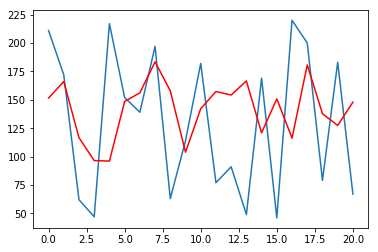

In [19]:
X = series.values
size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,0,3))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0] 
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()